# Using shallow water equations to understand large-scale dynamics
### MAQ - 32806, Chiel van Heerwaarden, 2016
In this tutorial you will the concept of potential vorticity to understand the generation of Rossby waves over topography.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import animation
from IPython.display import HTML
figsize_s = 6,4
figsize_l = 10,4

In [3]:
lat = 52.
r_earth = 6.371e6
omega = 7.29e-5
f0 = 2.*omega*np.sin(np.pi/180.*lat)
beta = 2.*omega*np.sin(np.pi/180.*lat) / r_earth
g = 9.81
L = r_earth * (2.*np.pi) * np.cos(np.pi/180.*lat)
L_dist = 10.e6
u_left = 10.
h_left = 200.
print(beta)

1.80335846611e-11


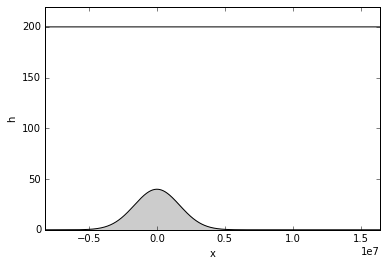

In [21]:
nx = 1501
x = np.linspace(-(1./3.)*L, (2./3.)*L, nx)
#y = np.linspace(-1e6, 1e6, ny)
dx = x[1]-x[0]
x_sigma = L_dist/6.
eta_bot = 0.2*h_left*np.exp(-x**2/(2.*x_sigma**2))
eta_top = h_left*np.ones(nx)

# Show the configuration
pl.figure(figsize=figsize_s)
pl.plot(x, eta_bot, 'k-')
pl.plot(x, eta_top, 'k-')
pl.xlim(x.min(), x.max())
pl.ylim(0, 1.1*eta_top.max())
pl.xlabel('x')
pl.ylabel('h');
pl.fill_between(x, 0, eta_bot, color='#cccccc')

In [22]:
h = eta_top - eta_bot
u = h_left/h*u_left
v = np.zeros(nx)

nt = 50000
ni = 500
dt = 10.

u_out = np.zeros((nt//ni+1, nx))
v_out = np.zeros((nt//ni+1, nx))
h_out = np.zeros((nt//ni+1, nx))
u_out[0,:], v_out[0,:], h_out[0,:] = u, v, h

for n in range(1,nt+1):
    #u[0] = u_left
    #v[0] = 0.
    #h[0] = h_left
    
    eta_top[:] = eta_bot[:] + h[:]
    
    dudx = np.gradient(u, dx)
    dvdx = np.gradient(v, dx)
    deta_topdx = np.gradient(eta_top, dx)
    dhdx = np.gradient(h, dx)
    
    u += dt * ( -u*dudx + f0*v - g*deta_topdx )
    v += dt * ( -u*dvdx - f0*u )
    h += dt * ( -u*dhdx - h*dudx )
    
    if (n%ni == 0):
        u_out[n//ni,:] = u[:]
        v_out[n//ni,:] = v[:]
        h_out[n//ni,:] = h[:]

eta_top_out = np.zeros(u_out.shape)
for i in range(eta_top_out.shape[0]):
    eta_top_out[i,:] = h_out[i,:] + eta_bot

-8215011.91041 16430023.8208 0 220.038047851


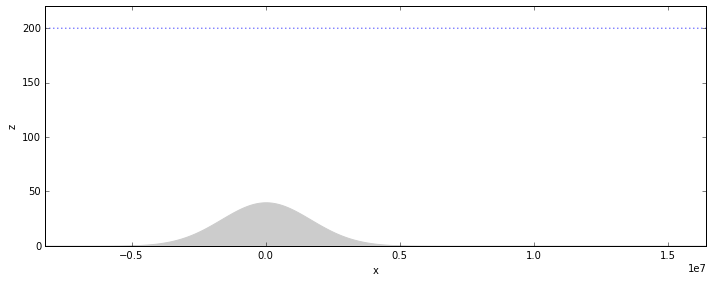

In [28]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = pl.subplots(figsize=figsize_l)
xmin, xmax = min(x), max(x)
zmin, zmax = 0, 1.1*np.max(eta_top_out)
print(xmin, xmax, zmin, zmax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(zmin, zmax)
ax.set_xlabel('x')
ax.set_ylabel('z')
pl.fill_between(x, 0, eta_bot, color='#cccccc')
ax.plot(x, eta_top_out[0,:], 'b:')
line, = ax.plot([], [], lw=2)
fig.tight_layout()

In [29]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(x, eta_top_out[i,:])
    return (line,)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=eta_top_out.shape[0], interval=40, blit=True)

# call our new function to display the animation
HTML(anim.to_html5_video())

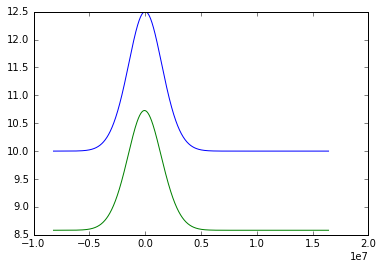

In [32]:
pl.plot(x, u_out[0,:])
pl.plot(x, u_out[10,:])